In [1]:
!pip3 install autoPyTorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 711 kB 7.4 MB/s 
     |████████████████████████████████| 4.9 MB 54.3 MB/s 
     |████████████████████████████████| 4.4 MB 37.8 MB/s 
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 202 kB 63.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
  Created wheel for smac: filename=smac-1.4.0-py3-none-any.whl size=262352 sha256=7e210a525c9461484bf99e20e129809703a7bb0f489cba6a7122b8190687bf77
  Stored in directory: /root/.cache/pip/wheels/70/01/53/

In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import sklearn.metrics
import time
from autoPyTorch.api.tabular_classification import TabularClassificationTask

In [3]:
TrainDataSet= pd.read_csv('../content/milknew.csv')
TrainDataSet.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
TrainDataSet.loc[TrainDataSet['Grade'] == 'high', 'Grade'] = 1
TrainDataSet.loc[TrainDataSet['Grade'] == 'medium', 'Grade'] = 2
TrainDataSet.loc[TrainDataSet['Grade'] == 'low', 'Grade'] = 3

In [5]:
input_cols = TrainDataSet.columns[:-1]
input_cols

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')

In [6]:
target_col =  TrainDataSet.columns[-1]
target_col

'Grade'

In [7]:
inputs_df = TrainDataSet[list(input_cols)].copy()
inputs_df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [8]:
targets = TrainDataSet[(target_col)]
targets

0       1
1       1
2       3
3       3
4       2
       ..
1054    2
1055    1
1056    3
1057    1
1058    3
Name: Grade, Length: 1059, dtype: object

In [9]:
X = inputs_df
y = targets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.2, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#X_train = torch.from_numpy(X_train)
#X_test = torch.from_numpy(X_test)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
api = TabularClassificationTask()

In [11]:
start = time.time()
history = api.search(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    optimize_metric='accuracy',
    total_walltime_limit=100,
    func_eval_time_limit_secs=10
)
stop = time.time()
print(f"Training time: {stop - start}s")

[ERROR] [2022-10-31 22:38:37,281:Client-AutoPyTorch:c01674c2-596c-11ed-804a-0242ac1c0002:1] Prediction for lgb failed with run state StatusType.CRASHED.
Additional info:
traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/tae.py", line 61, in fit_predict_try_except_decorator
    ta(queue=queue, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 512, in eval_train_function
    evaluator.fit_predict_and_loss()
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 189, in fit_predict_and_loss
    add_pipeline_to_self=True)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/train_evaluator.py", line 364, in _fit_and_predict
    fit_and_suppress_warnings(self.logger, pipeline, X, y)
  File "/usr/local/lib/python3.7/dist-packages/autoPyTorch/evaluation/abstract_evaluator.py", line 339, in fit_and_suppress_warnings


/usr/local/lib/python3.7/dist-packages/smac/intensification/parallel_scheduling.py:155: UserWarning: Hyperband is executed with 1 workers only. Consider to use pynisher to use all available workers.
  f"{self.__class__.__name__} is executed with {num_workers} workers only. "


Training time: 113.13924074172974s


In [12]:
predictions = api.predict(X_test)
#print("Precision", sklearn.metrics.precision_score(y_test, predictions))
#print("Recall", sklearn.metrics.recall_score(y_test, predictions))
#print("Loss", sklearn.metrics.log_loss(y_test, predictions))
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 1.0


In [13]:
print(api.sprint_statistics())

autoPyTorch results:
	Dataset name: c01674c2-596c-11ed-804a-0242ac1c0002
	Optimisation Metric: accuracy
	Best validation score: 1.0
	Number of target algorithm runs: 16
	Number of successful target algorithm runs: 11
	Number of crashed target algorithm runs: 3
	Number of target algorithms that exceeded the time limit: 2
	Number of target algorithms that exceeded the memory limit: 0



In [14]:
score = api.score(y_test, predictions)
print(score)

{'accuracy': 1.0}


In [15]:
print(api.show_models())

|    | Preprocessing                                                                                | Estimator                                                          |   Weight |
|---:|:---------------------------------------------------------------------------------------------|:-------------------------------------------------------------------|---------:|
|  0 | SimpleImputer,Variance Threshold,NoCoalescer,NoEncoder,StandardScaler,NoFeaturePreprocessing | no embedding,ShapedMLPBackbone,FullyConnectedHead,nn.Sequential    |     0.14 |
|  1 | SimpleImputer,Variance Threshold,NoCoalescer,NoEncoder,StandardScaler,Nystroem               | no embedding,ShapedResNetBackbone,FullyConnectedHead,nn.Sequential |     0.12 |
|  2 | None                                                                                         | SVMLearner                                                         |     0.12 |
|  3 | None                                                                               

In [16]:
y_pred = api.predict(X_test)
y_test = np.array(y_test)

error = 0;

for i in range(len(y_test)):
  print("valor real: ", y_test[i])
  print("valor estimado: ", y_pred[i])
  if(y_test[i] != y_pred[i]):
    error = error + 1;
  print("---------------------------------- ")

error_rate = error  / len(y_test) 
print("Error: ",error_rate)

valor real:  2.0
valor estimado:  2.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  2.0
valor estimado:  2.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  3.0
valor estimado:  3.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  2.0
valor estimado:  2.0
---------------------------------- 
valor real:  1.0
valor estimado:  1.0
---------------------------------- 
valor real:  2.0
valor estimado:  2.0


[WARNING] [2022-10-31 22:40:58,564:matplotlib.font_manager] findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


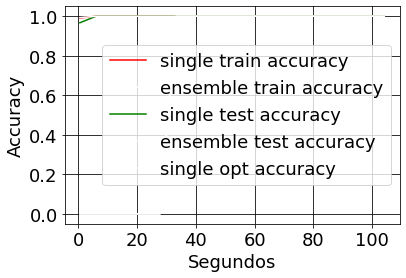

In [17]:
from autoPyTorch.utils.results_visualizer import PlotSettingParams,ColorLabelSettings
metric_name = 'accuracy'

params = PlotSettingParams(
    #xscale='log',
    xlabel='Segundos',
    ylabel='Accuracy',
    #title='Toy Example',
    
    legend=True,
    figname= None,#'example_plot_over_time.png',
    #savefig_kwargs={'bbox_inches': 'tight'},
    show=True,  # If you would like to show, make it True and set figname=None,

)

api.plot_perf_over_time(
    metric_name=metric_name,
    plot_setting_params=params,
    #marker='*',
    #markersize=10,
    color_label_settings= ColorLabelSettings(single_train=('red', None), single_opt=('white', None), single_test=('green', None), ensemble_train=('white', None), ensemble_test=('white', None))
)
